# Artifical Neural Network

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.16.1'

# Part 1- Data Preprocessing

Importing the dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:,3:-1].values
y = dataset.iloc[:,-1].values

In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
print(y)

[1 0 1 ... 1 1 0]


# Encoding categorical data

Label Encoding the "Gender" column

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:,2])

In [7]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


# Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Building the ANN 

## Initializing is the feed propagation network

## Initializing the ANN

In [15]:
ann = tf.keras.models.Sequential()

## Adding the input layer and the first hidden layer with relu as the activation function

In [16]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Adding the second hidden layer using the same relu as the activation function

In [17]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

## Adding the output layer using sigmoid activation function

In [18]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

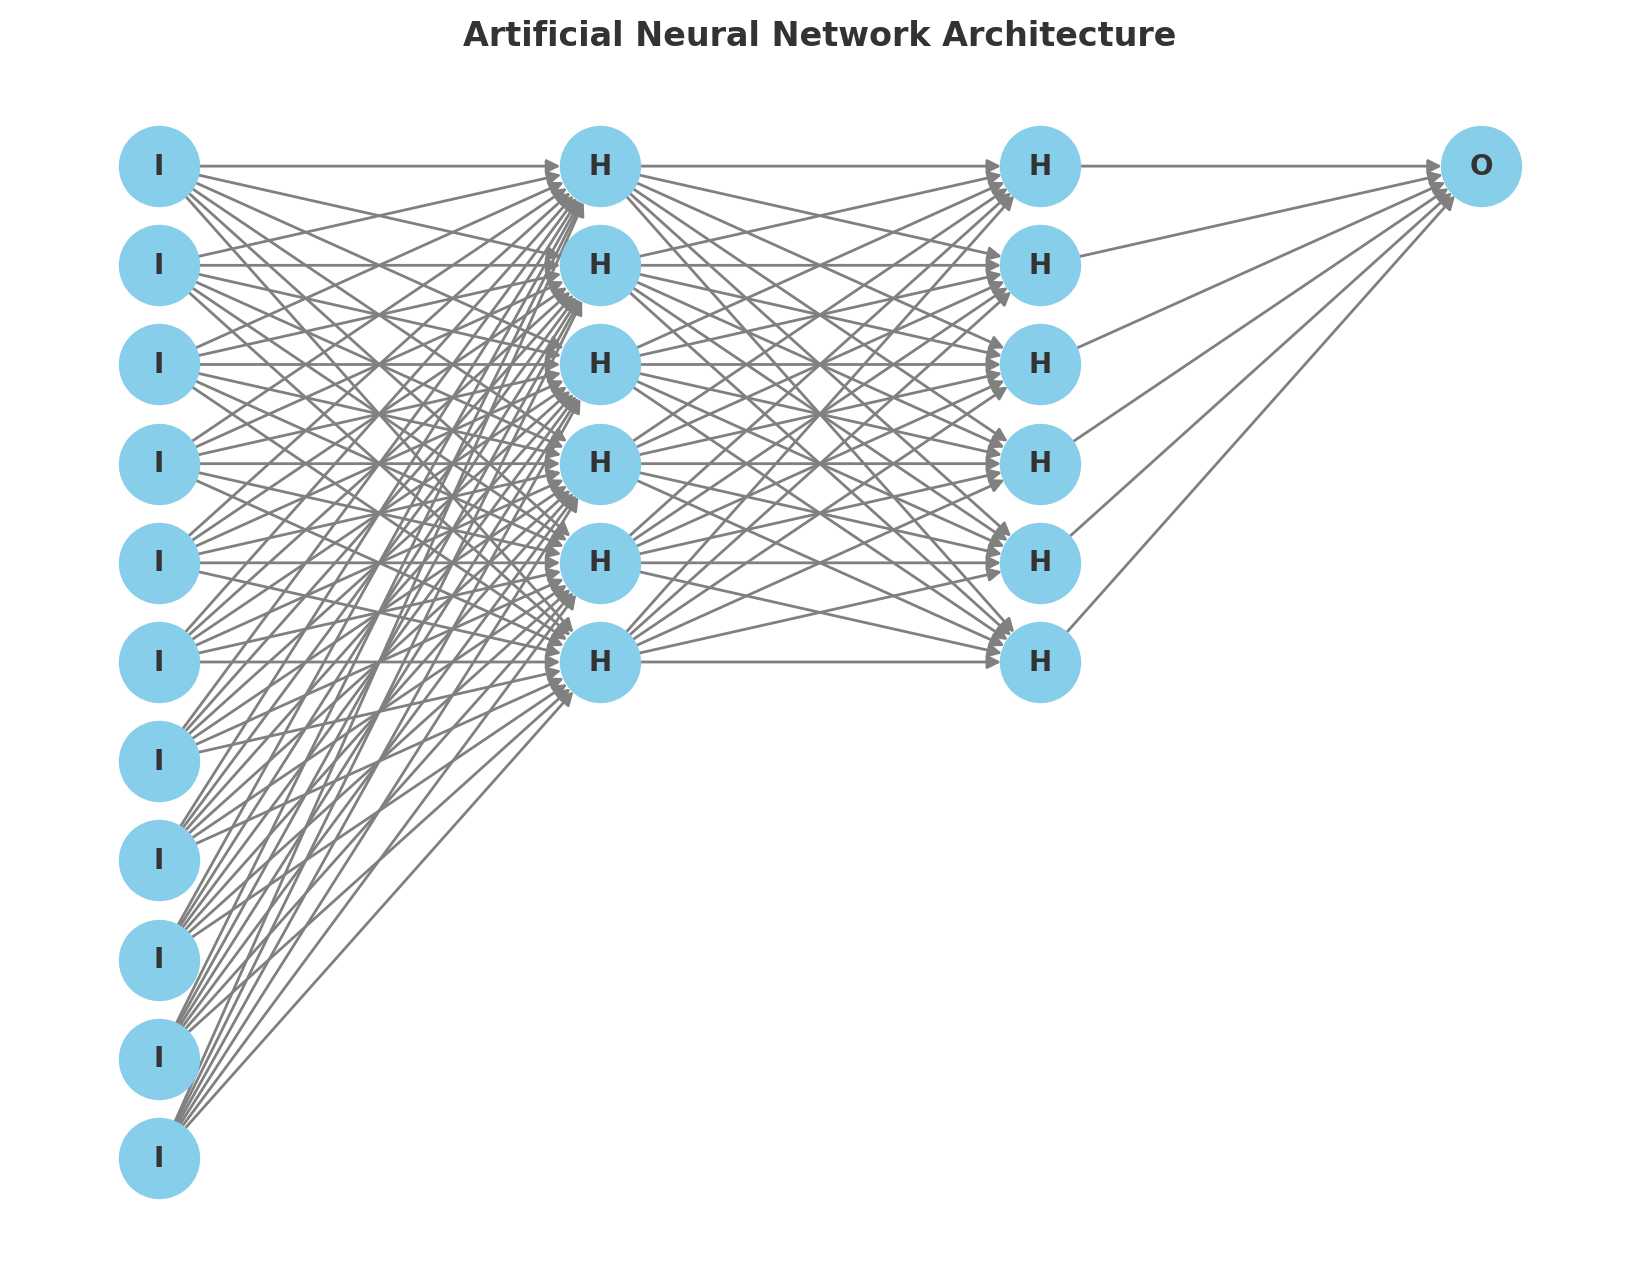

# Part 3 - Training the ANN

## Compliation is the back propagation network

## Compiling the ANN using the Adam optimizer

In [20]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training Test

In [21]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6700 - loss: 0.6365
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7900 - loss: 0.4863
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8056 - loss: 0.4503
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8145 - loss: 0.4292
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8210 - loss: 0.4109
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8202 - loss: 0.4205
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8309 - loss: 0.4101
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8195 - loss: 0.4152
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8294 - loss: 0.4019
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8254 - loss: 0.4026
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8220 - loss: 0.4080
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

# Part 4 - Making the predictions and evaluating the model

## Predicting the result of a single observation

In [22]:
ann.predict(sc.transform([[1,123,123,700,1,40,3,60000,2,1,1,50000]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


array([[1.]], dtype=float32)

In [26]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]])))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[[0.02210047]]


## Predicting the Test set results

In [23]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

## Making the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1519   76]
 [ 206  199]]


0.859

In [27]:
## Predict method always expects a 2D Array as the format for the inputs. One hot encoded values must be included in first three columns as dummy varibles are always created in the first columns.